# CNN

## Import MNIST Images - Deep Learning with PyTorch 14

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Convert MNIST Image Files into a Tensor of 4-Dimensions (# of images, Height, Width, Color Channel)
transform = transforms.ToTensor()

In [4]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 83015443.19it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 35091452.44it/s]

Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 19775792.85it/s]

Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3386760.67it/s]


Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [5]:
# test Data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
pwd

'/content'

In [9]:
ls

sample_data/


In [10]:
cd ../

/


In [11]:
ls -al

total 116
drwxr-xr-x   1 root root  4096 Oct 17 21:53 ./
drwxr-xr-x   1 root root  4096 Oct 17 21:53 ../
lrwxrwxrwx   1 root root     7 Jun  5 14:02 bin -> usr/bin/
drwxr-xr-x   2 root root  4096 Apr 18  2022 boot/
drwxr-xr-x   3 root root  4096 Oct 17 21:53 cnn_data/
drwxr-xr-x   1 root root  4096 Oct 16 13:23 content/
-rw-r--r--   1 root root  4332 Jun 21 00:40 cuda-keyring_1.0-1_all.deb
drwxr-xr-x   1 root root  4096 Oct 16 13:52 datalab/
drwxr-xr-x   6 root root   460 Oct 17 21:51 dev/
-rwxr-xr-x   1 root root     0 Oct 17 21:51 .dockerenv*
drwxr-xr-x   1 root root  4096 Oct 17 21:51 etc/
drwxr-xr-x   2 root root  4096 Apr 18  2022 home/
lrwxrwxrwx   1 root root     7 Jun  5 14:02 lib -> usr/lib/
lrwxrwxrwx   1 root root     9 Jun  5 14:02 lib32 -> usr/lib32/
lrwxrwxrwx   1 root root     9 Jun  5 14:02 lib64 -> usr/lib64/
lrwxrwxrwx   1 root root    10 Jun  5 14:02 libx32 -> usr/libx32/
drwxr-xr-x   2 root root  4096 Jun  5 14:02 media/
drwxr-xr-x   2 root root  4096 Jun  5 14:02 m

In [12]:
cd cnn_data

/cnn_data


In [13]:
ls -l

total 4
drwxr-xr-x 3 root root 4096 Oct 17 21:53 MNIST/


In [14]:
cd /

/


In [15]:
ls -l

total 108
lrwxrwxrwx   1 root root     7 Jun  5 14:02 bin -> usr/bin/
drwxr-xr-x   2 root root  4096 Apr 18  2022 boot/
drwxr-xr-x   3 root root  4096 Oct 17 21:53 cnn_data/
drwxr-xr-x   1 root root  4096 Oct 16 13:23 content/
-rw-r--r--   1 root root  4332 Jun 21 00:40 cuda-keyring_1.0-1_all.deb
drwxr-xr-x   1 root root  4096 Oct 16 13:52 datalab/
drwxr-xr-x   6 root root   460 Oct 17 21:51 dev/
drwxr-xr-x   1 root root  4096 Oct 17 21:51 etc/
drwxr-xr-x   2 root root  4096 Apr 18  2022 home/
lrwxrwxrwx   1 root root     7 Jun  5 14:02 lib -> usr/lib/
lrwxrwxrwx   1 root root     9 Jun  5 14:02 lib32 -> usr/lib32/
lrwxrwxrwx   1 root root     9 Jun  5 14:02 lib64 -> usr/lib64/
lrwxrwxrwx   1 root root    10 Jun  5 14:02 libx32 -> usr/libx32/
drwxr-xr-x   2 root root  4096 Jun  5 14:02 media/
drwxr-xr-x   2 root root  4096 Jun  5 14:02 mnt/
-rw-r--r--   1 root root 17294 Jun 21 00:39 NGC-DL-CONTAINER-LICENSE
drwxr-xr-x   1 root root  4096 Oct 17 21:51 opt/
dr-xr-xr-x 205 root root     

In [16]:
cd content/

/content


In [17]:
ls -al

total 16
drwxr-xr-x 1 root root 4096 Oct 16 13:23 ./
drwxr-xr-x 1 root root 4096 Oct 17 21:53 ../
drwxr-xr-x 4 root root 4096 Oct 16 13:23 .config/
drwxr-xr-x 1 root root 4096 Oct 16 13:23 sample_data/


## Convolutional and Pooling Layers - Deep Learning with PyTorch 15


In [18]:
# Create a small batch size for images...  let's say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [19]:
# Define the CNN Model
# Decribe the convolutional layer and what it's doing (2 convolutional layers)
# This is an example
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)


In [20]:
# Grab 1 MNIST record/image
for i, (X_train, y_train) in enumerate(train_data):
  break

In [21]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [22]:
 X_train.shape

torch.Size([1, 28, 28])

In [23]:
x = X_train.view(1,1, 28, 28)

In [24]:
# Perform the first convolution
x = F.relu(conv1(x)) # Rectified Linear Unit for the activation function

In [25]:
x

tensor([[[[0.0787, 0.0787, 0.0787,  ..., 0.0787, 0.0787, 0.0787],
          [0.0787, 0.0787, 0.0787,  ..., 0.0787, 0.0787, 0.0787],
          [0.0787, 0.0787, 0.0787,  ..., 0.0787, 0.0787, 0.0787],
          ...,
          [0.0787, 0.0787, 0.1688,  ..., 0.0787, 0.0787, 0.0787],
          [0.0787, 0.0787, 0.0390,  ..., 0.0787, 0.0787, 0.0787],
          [0.0787, 0.0787, 0.0787,  ..., 0.0787, 0.0787, 0.0787]],

         [[0.1850, 0.1850, 0.1850,  ..., 0.1850, 0.1850, 0.1850],
          [0.1850, 0.1850, 0.1850,  ..., 0.1850, 0.1850, 0.1850],
          [0.1850, 0.1850, 0.1850,  ..., 0.1850, 0.1850, 0.1850],
          ...,
          [0.1850, 0.1850, 0.1209,  ..., 0.1850, 0.1850, 0.1850],
          [0.1850, 0.1850, 0.2727,  ..., 0.1850, 0.1850, 0.1850],
          [0.1850, 0.1850, 0.1850,  ..., 0.1850, 0.1850, 0.1850]],

         [[0.0170, 0.0170, 0.0170,  ..., 0.0170, 0.0170, 0.0170],
          [0.0170, 0.0170, 0.0170,  ..., 0.0170, 0.0170, 0.0170],
          [0.0170, 0.0170, 0.0170,  ..., 0

In [26]:
# 1 is the single image, 6 is the filters asked for, 26x26
x.shape

torch.Size([1, 6, 26, 26])

In [27]:
# Pass through the pooling layer
x = F.max_pool2d(x, 2, 2) # Kernel of 2 and stride of 2

In [28]:
x.shape # 26 / 2 = 13

torch.Size([1, 6, 13, 13])

In [29]:
# Do the second convolutional layer
x = F.relu(conv2(x))

In [30]:
x.shape # Again, no padding was specified so 2 pixels were lost around the outside of the image

torch.Size([1, 16, 11, 11])

In [31]:
# Pooling layer
x = F.max_pool2d(x, 2, 2)

In [32]:
x.shape # 11 / 2 = 5.5 but it is rounded down because no data can invented to round up

torch.Size([1, 16, 5, 5])

In [33]:
(((28-2) / 2) -2) / 2

5.5

## Convolutional Neural Network Model - Deep Learning with PyTorch 16


In [34]:
# Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)

    # Fully Connected Layers
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2) # 2x2 kernel and stride = 2
    # Second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2) # 2x2 kernel and stride = 2

    # Re-View the data to flatten it out
    X = X.view(-1, 16*5*5) # Negative one so the batch size can be varied

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)



In [35]:
# Create an Instance of the Model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [36]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # The smaller the learning rate, the longer it's going to take to train

## Train and Test CNN Model - Deep Learning with PyTorch 17

In [37]:
import time
start_time = time.time()

# Create Variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


# For Loop offor Epochs
for i in range(epochs):
  training_correct = 0
  testing_correct = 0

  # Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1 # Start the batches at 1

    y_pred = model(X_train) # Get the predicted values from the training set (data is 2d, not flattened.)
    loss = criterion(y_pred, y_train) # How off are we? Compare the predictions to the correct answers in y_train

    predicted = torch.max(y_pred.data, 1)[1] # Add up the number of correct predictions. Indexed off the first point
    batch_correct = (predicted == y_train).sum() # How many we got correct from this specific batch. True=1, False=0, sum those up.
    training_correct += batch_correct # Keep track as we go along in training.

    # Update the parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if b % 600 == 0 :
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')


  train_losses.append(loss)
  train_correct.append(training_correct)

  # Test
  with torch.no_grad(): # No gradient so the weights and the bias are not updated with test data
    for b , (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      testing_correct += (predicted == y_test).sum() # True=1, False=0, sum all

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(testing_correct)

current_time = time.time()
total = current_time - start_time
print(f'Training time: {total/60} minutes!')
total

Epoch: 0 Batch: 600 Loss: 0.1623624861240387
Epoch: 0 Batch: 1200 Loss: 0.1641543209552765
Epoch: 0 Batch: 1800 Loss: 0.5098981857299805
Epoch: 0 Batch: 2400 Loss: 0.1306418627500534
Epoch: 0 Batch: 3000 Loss: 0.005703817121684551
Epoch: 0 Batch: 3600 Loss: 0.46332210302352905
Epoch: 0 Batch: 4200 Loss: 0.004197881557047367
Epoch: 0 Batch: 4800 Loss: 0.0018000779673457146
Epoch: 0 Batch: 5400 Loss: 0.07375213503837585
Epoch: 0 Batch: 6000 Loss: 0.0003859388525597751
Epoch: 1 Batch: 600 Loss: 0.004290326032787561
Epoch: 1 Batch: 1200 Loss: 0.2521086633205414
Epoch: 1 Batch: 1800 Loss: 0.002427826402708888
Epoch: 1 Batch: 2400 Loss: 0.0021776421926915646
Epoch: 1 Batch: 3000 Loss: 0.02223074808716774
Epoch: 1 Batch: 3600 Loss: 0.6111965179443359
Epoch: 1 Batch: 4200 Loss: 0.016707444563508034
Epoch: 1 Batch: 4800 Loss: 0.0006908098584972322
Epoch: 1 Batch: 5400 Loss: 0.0002799260546453297
Epoch: 1 Batch: 6000 Loss: 0.4848875403404236
Epoch: 2 Batch: 600 Loss: 0.03840283304452896
Epoch: 2

181.09181928634644

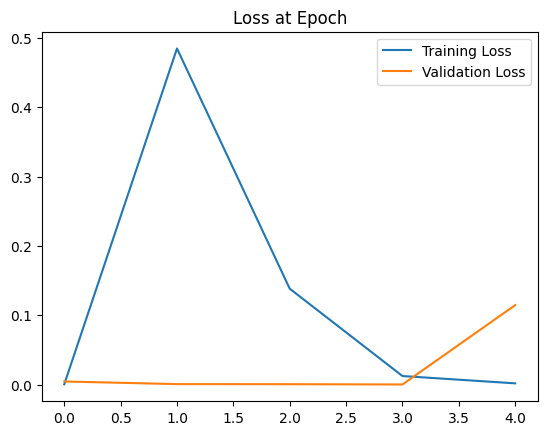

In [38]:
# Graph the loss of Epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss at Epoch')
plt.legend()

In [43]:

import time
start_time = time.time()

# Create Variables To Tracks Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the training set. Not flattened 2D
    loss = criterion(y_pred, y_train) # how off are we? Compare the predictions to correct answers in y_train

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False=0, sum those up
    trn_corr += batch_corr # keep track as we go along in training.

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    # Print out some results
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Test
  with torch.no_grad(): #No gradient so we don't update our weights and biases with test data
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away


  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0  Batch: 600  Loss: 1.5258686971719726e-06
Epoch: 0  Batch: 1200  Loss: 0.168989360332489
Epoch: 0  Batch: 1800  Loss: 2.086142558255233e-06
Epoch: 0  Batch: 2400  Loss: 2.9802276912960224e-07
Epoch: 0  Batch: 3000  Loss: 9.488784598943312e-06
Epoch: 0  Batch: 3600  Loss: 0.014862915500998497
Epoch: 0  Batch: 4200  Loss: 0.00016575635527260602
Epoch: 0  Batch: 4800  Loss: 0.00015801463450770825
Epoch: 0  Batch: 5400  Loss: 0.00019357565906830132
Epoch: 0  Batch: 6000  Loss: 3.496990757412277e-05
Epoch: 1  Batch: 600  Loss: 6.198691153258551e-06
Epoch: 1  Batch: 1200  Loss: 1.1455599633336533e-05
Epoch: 1  Batch: 1800  Loss: 0.001703915884718299
Epoch: 1  Batch: 2400  Loss: 1.4305105366929638e-07
Epoch: 1  Batch: 3000  Loss: 1.275532326872053e-06
Epoch: 1  Batch: 3600  Loss: 0.003019407857209444
Epoch: 1  Batch: 4200  Loss: 2.8133265459473478e-06
Epoch: 1  Batch: 4800  Loss: 4.0172722037823405e-06
Epoch: 1  Batch: 5400  Loss: 7.653100510651711e-06
Epoch: 1  Batch: 6000  Loss: 0.

## Graph CNN Results - Deep Learning with PyTorch 18

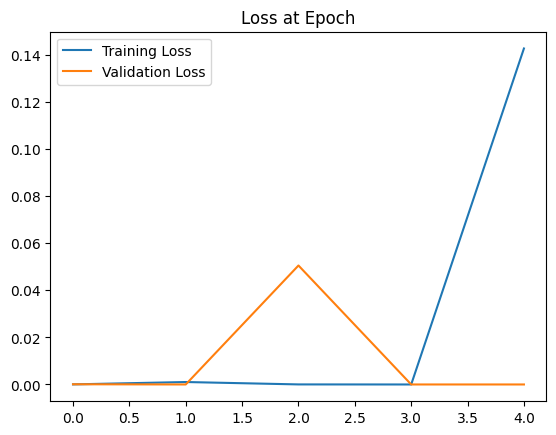

In [44]:
# Graph the loss of Epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss at Epoch')
plt.legend()

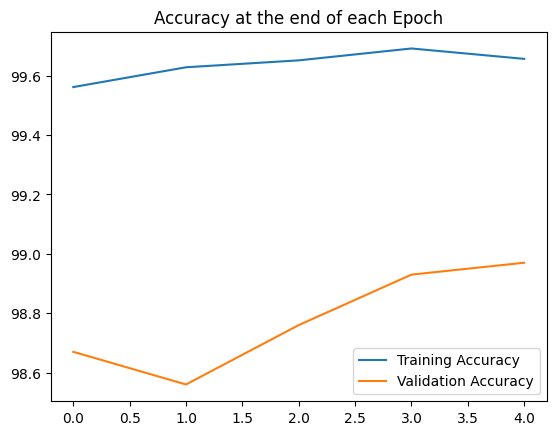

In [45]:
# Graph the accuracy at the end of each Epoch
plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/100 for t in test_correct], label='Validation Accuracy')
plt.title('Accuracy at the end of each Epoch')
plt.legend()

In [46]:
test_load_everything = DataLoader(test_data, batch_size=10_000, shuffle=False)

In [48]:
with torch.no_grad():
  correct = 0

  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()


In [49]:
# Did for correct (out of 10000)
correct.item()

9897

In [50]:
 # Did for correct (percentage of correct)
 correct.item() / len(test_data) * 100

98.97